## Extending to four Component PR EOS

In [43]:
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib import rcParams
import numpy as np
import matplotlib.cm as cm # matplotlib's color map library
#rcParams['figure.figsize'] = 18.75, 18.75
from scipy import stats
import seaborn as sns
from scipy.interpolate import griddata
import seaborn as sns
import pr_z_v6 as pr_z
R, mwAir, degF2R = 10.731577089016, 28.97, 459.67

import importlib
importlib.reload(pr_z)
import pyrestoolbox as rtb
importlib.reload(rtb)

<module 'pyrestoolbox' from 'C:\\Users\\burmr\\OneDrive - Santos\\Work in progress\\Python\\0-ResEng\\Z-Factors\\Inerts\\pyrestoolbox.py'>

In [2]:
pr_z.tc_pc(0.6)

(356.84349106107175, 657.1961343655729)

In [3]:
degf, psia, sg, co2, h2s, n2 = 220, 15000, 0.6, 0.0, 0, 0
z = pr_z.peng_robinson_z(degf, psia, sg, co2=co2, h2s=h2s, n2=n2)
vis = pr_z.lbc(z, degf, psia, sg, co2=co2, h2s=h2s, n2=n2)
z, vis

(1.8089108630967519, 0.042793609569162644)

In [4]:
def Zplots(component, psat_coefics):
    rcParams['figure.figsize'] = 9, 9

    plt.plot(Zs, calc_Zs, 'o')
    plt.plot([min(Zs), max(Zs)], [min(Zs), max(Zs)], '--', c='k')
    plt.title(component+' Calculated Z-Factor vs GERG2008')
    plt.xlabel('GERG2008 Z-Factor')
    plt.ylabel('Calculated Z-Factor')
    plt.grid()
    plt.savefig(component+'_1.png')
    plt.show()
    errs = np.abs(calc_Zs - Zs)/Zs
    print('Average Relative error:',np.mean(errs))
    print('95% of data better than error:', np.percentile(errs, 95))
    
    errs = (calc_Zs - Zs)/Zs
    plt.plot(Zs, errs, 'o')
    plt.title(component+' Relative Error in Calculated Z-Factor')
    plt.xlabel('GERG2008 Z-Factor')
    plt.ylabel('(Calculated-Z - GERG2008-Z)/GERG2008-Z')
    plt.grid()
    plt.ylim(-0.1, 0.1)
    plt.savefig(component+'_2.png')
    plt.show()
    
    #fig, ax = plt.subplots()
    #res = stats.probplot(errs, plot=ax)
    #ax.set_title('Normal Probability Plot of '+component+' Residuals')
    #ax.set_xlabel('Theoretical Quantiles')
    #ax.set_ylabel('Ordered Values')
    #plt.show()

    x = degfs
    y = psias
    z = errs
    
    tc, a0, a1, a2, a3 = psat_coefics
    tsat = np.arange(x[0], tc, 0.1)
    psat = a0*tsat**3+a1*tsat**2+a2*tsat+a3
    pc = a0*tc**3+a1*tc**2+a2*tc+a3

    # target grid to interpolate to
    yi = np.arange(15,15000,20)
    xi = np.arange(50, 300, 5)
    xi,yi = np.meshgrid(xi,yi)

    # interpolate
    zi = griddata((x,y), z, (xi,yi),method='linear')

    rcParams['figure.figsize'] = 11, 9
    fig, ax = plt.subplots()
    #c = ax.pcolormesh(xi, yi, zi, cmap='RdBu', vmin=zi.min(), vmax=zi.max())
    c = ax.pcolormesh(xi, yi, zi, cmap='RdBu', vmin=-0.05, vmax=0.05)
    levels = np.arange(-0.05, 0.06, 0.01)
    CS = ax.contour(xi, yi, zi, levels=levels, linewidths=0.5, colors='k')
    ax.clabel(CS, inline=True, fontsize=10)

    ax.set_title(component+' Relative Error (Zcalc - Z_GERG) / Z_GERG')
    # set the limits of the plot to the limits of the data
    ax.axis([xi.min(), xi.max(), yi.min(), yi.max()])
    ax.set_ylabel('psia')
    ax.set_xlabel('degf')
    ax.set_ylim(0, 15000)
    ax.set_xlim(60, 300)
    
    plt.plot(tsat, psat, c='g')
    plt.plot([tc], [pc], 'o', c='g')
    
    #ax.set_ylim(0, 15)
    fig.colorbar(c, ax=ax)
    plt.savefig(component+'_3.png')
    plt.show()
    rcParams['figure.figsize'] = 9, 9

def molar_plots(component):
    rcParams['figure.figsize'] = 9, 9
    v = R*(degfs+degF2R)*Zs/psias
    v_calc = R*(degfs+degF2R)*calc_Zs/psias
    
    plt.plot(v, v_calc, 'o')
    plt.plot([min(v), max(v)], [min(v), max(v)], '--', c='k')
    plt.title(component+' Calculated Molar Volume vs GERG2008')
    plt.xlabel('GERG2008 Molar Volume (ft3/lbmol)')
    plt.ylabel('Calculated Molar Volume (ft3/lbmol)')
    plt.grid()
    #plt.savefig('co2.png')
    plt.show()
    errs = np.abs(v_calc - v)/v
    print('Average Relative error:',np.mean(errs))
    print('95% of data better than error:', np.percentile(errs, 95))
    
    errs = (v_calc - v)/v
    plt.plot(v, errs, 'o')
    plt.title(component+' Relative Error in Calculated Molar Volumes')
    plt.xlabel('GERG2008 Molar Volume (ft3/lbmol)')
    plt.ylabel('(Calculated-Volume - GERG2008-Volume)/GERG2008-Volume')
    plt.grid()
    plt.ylim(-0.1, 0.1)
    plt.savefig(component+'_4.png')
    plt.show()

def Zplots95(component, method):
    
    x = degfs
    y = psias
    z = errs

    # target grid to interpolate to
    yi = np.arange(15,15000,20)
    xi = np.arange(50, 300, 5)
    xi,yi = np.meshgrid(xi,yi)

    # interpolate
    zi = griddata((x,y), z, (xi,yi),method='linear')

    rcParams['figure.figsize'] = 11, 9
    fig, ax = plt.subplots()
    #c = ax.pcolormesh(xi, yi, zi, cmap='RdBu', vmin=zi.min(), vmax=zi.max())
    c = ax.pcolormesh(xi, yi, zi, cmap='RdBu', vmin=-0.5, vmax=0.5)
    levels = np.arange(-0.5, 0.51, 0.01)
    CS = ax.contour(xi, yi, zi, levels=levels, linewidths=0.5, colors='k')
    ax.clabel(CS, inline=True, fontsize=10)

    ax.set_title(method+', 95% '+component+' : 5% CH4  Relative Error (Zcalc - Z_GERG) / Z_GERG')
    # set the limits of the plot to the limits of the data
    ax.axis([xi.min(), xi.max(), yi.min(), yi.max()])
    ax.set_ylabel('psia')
    ax.set_xlabel('degf')
    ax.set_ylim(0, 15000)
    ax.set_xlim(60, 300)
    
    #ax.set_ylim(0, 15)
    fig.colorbar(c, ax=ax)
    plt.savefig(component+'_95pc_'+method+'_3.png')
    plt.show()
    rcParams['figure.figsize'] = 9, 9

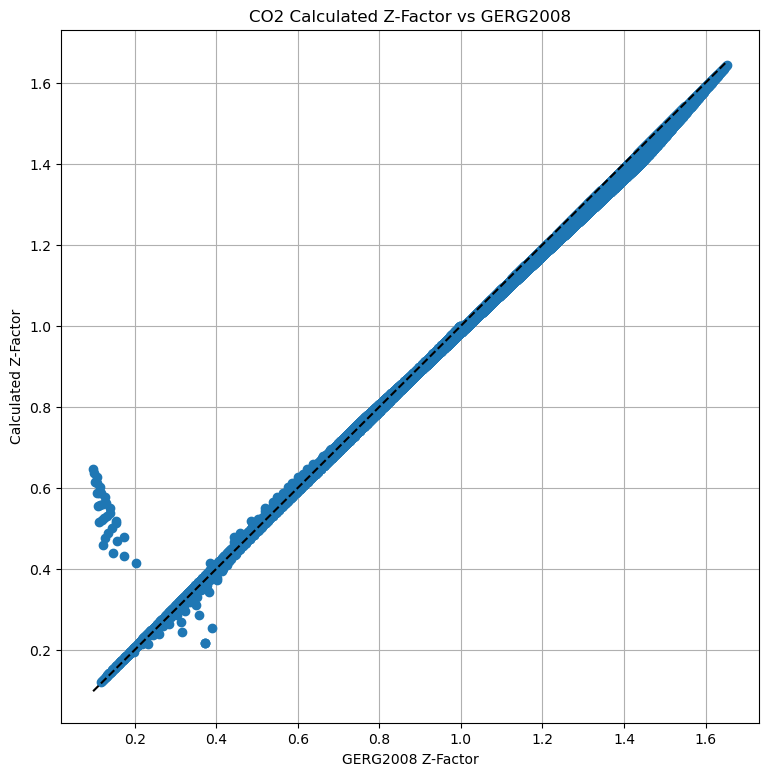

Average Relative error: 0.016240597736604804
95% of data better than error: 0.024905711283333538


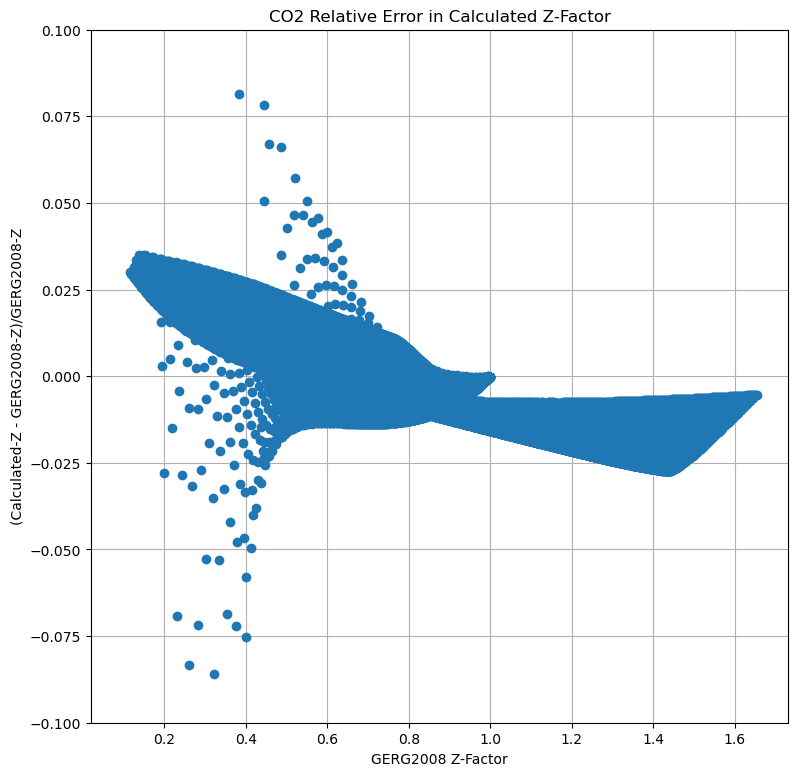

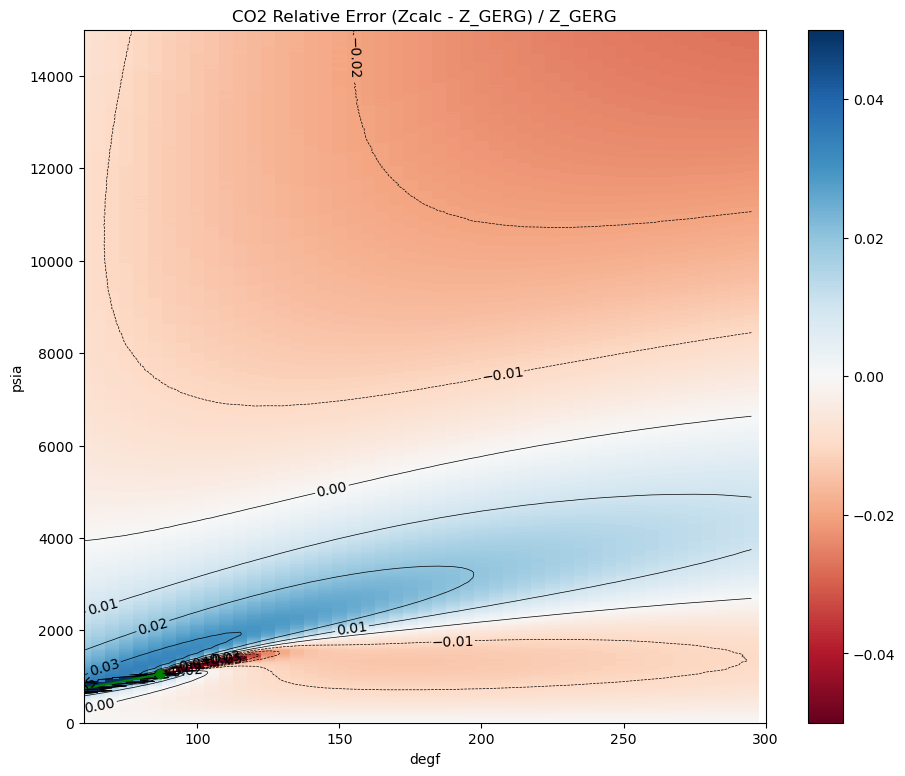

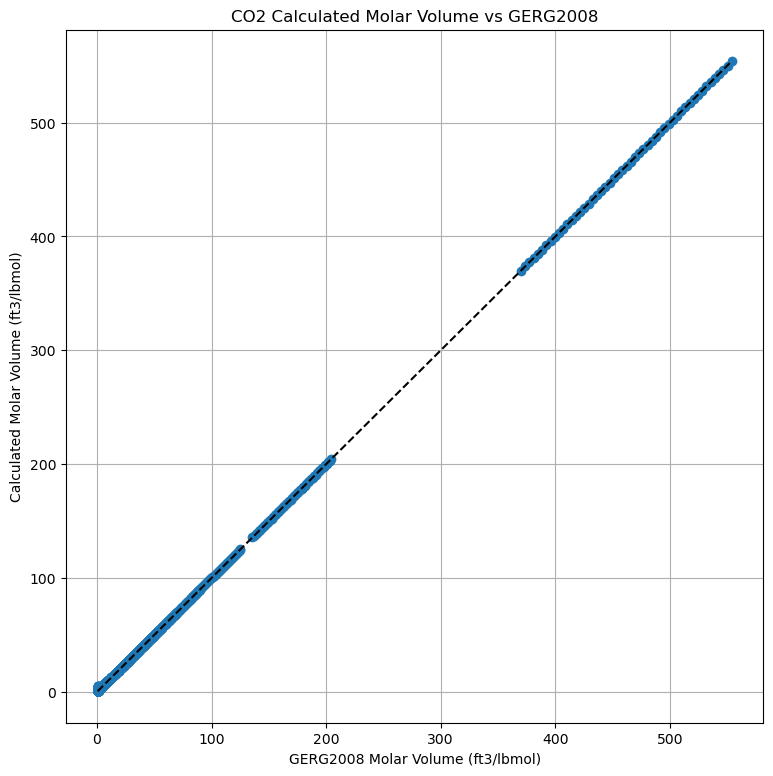

Average Relative error: 0.016240597736604804
95% of data better than error: 0.024905711283333482


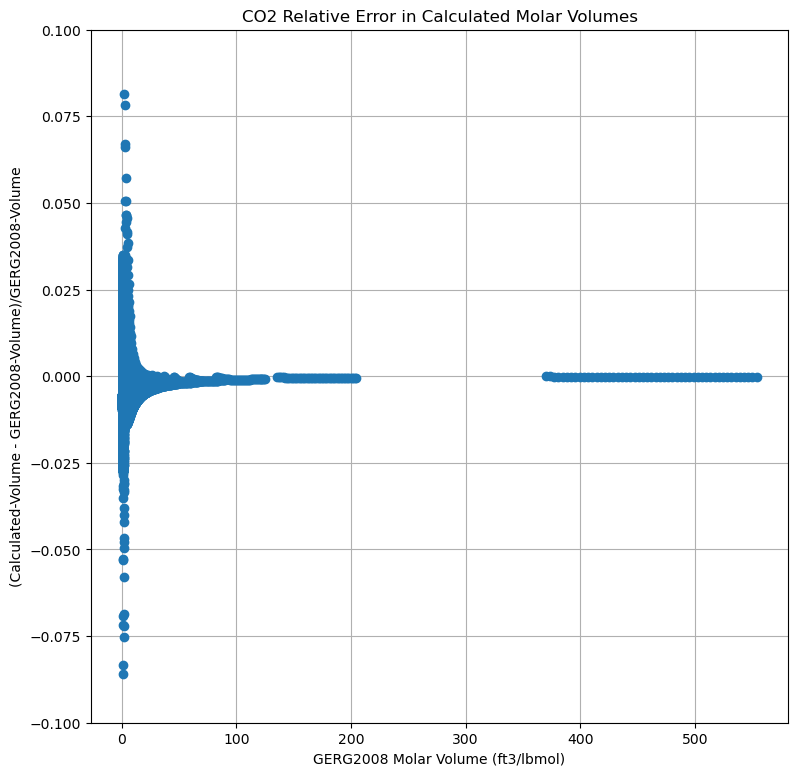

In [44]:
# Compare pure CO2
mwAir = 28.97
mwGas = 44.01
sg = mwGas/mwAir
co2, h2s, n2 = 1.0, 0.0, 0.0
df = pd.read_excel('Z-GERG_CO2.xlsx')#, sheet_name='CO2')
degfs = np.array(df['Temperature (F)'])
psias = np.array(df['Pressure (psia)'])
Zs = np.array(df['Z'])
densities = psias*mwGas/(Zs*R*(degfs+degF2R))
calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sg, co2=co2, h2s=h2s, n2=n2))
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
errs = np.abs(calc_Zs - Zs)/Zs
Zplots('CO2', [87, 0.000199491, 0.016819666, 5.798738321, 296.0668442])
molar_plots('CO2')

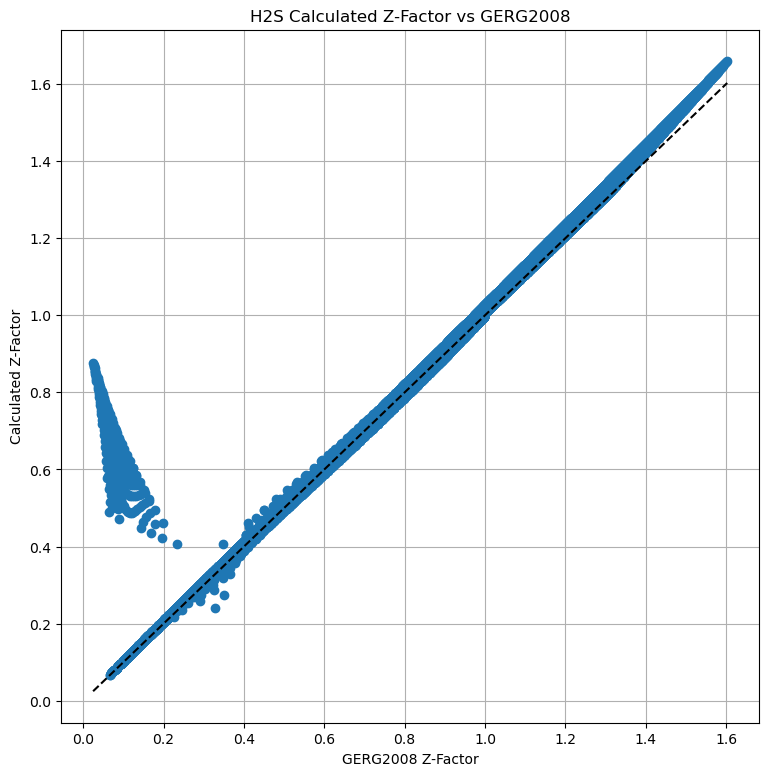

Average Relative error: 0.11702474157238478
95% of data better than error: 0.03195653841958795


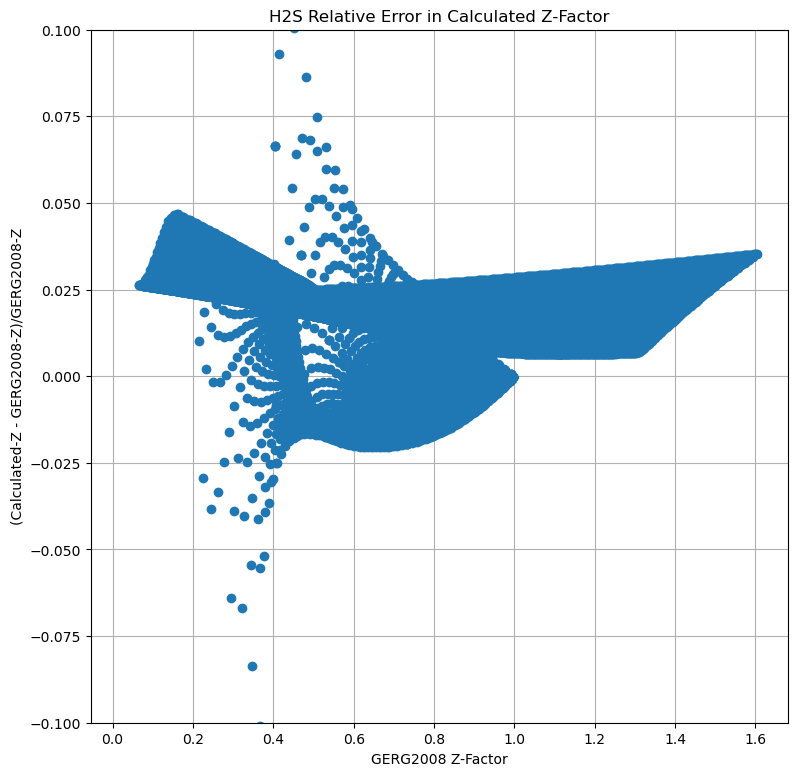

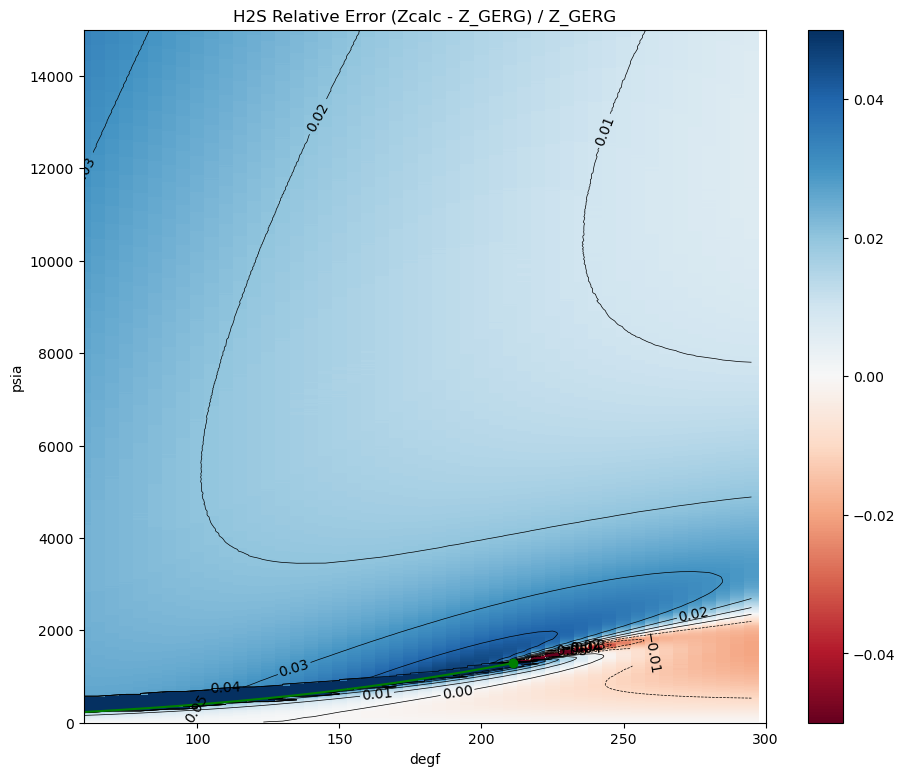

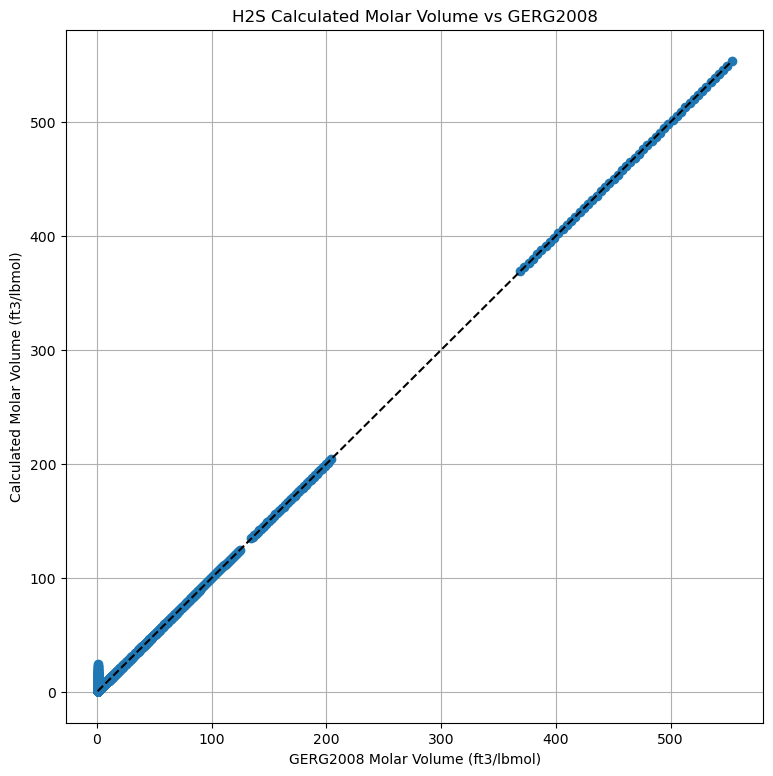

Average Relative error: 0.11702474157238478
95% of data better than error: 0.03195653841958787


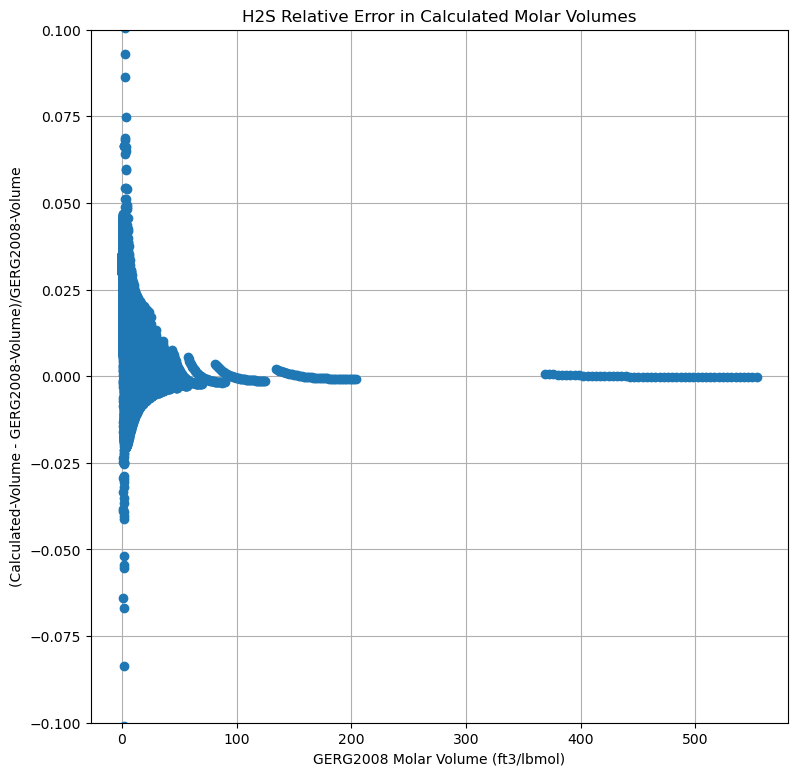

In [45]:
# Compare pure H2S
mwGas = 34.082
sg = mwGas/mwAir
co2, h2s, n2 = 0.0, 1.0, 0.0
df = pd.read_excel('Z-GERG_H2S.xlsx')#, sheet_name='H2S')
degfs = np.array(df['Temperature (F)'])
psias = np.array(df['Pressure (psia)'])
Zs = np.array(df['Z'])
densities = psias*mwGas/(Zs*R*(degfs+degF2R))
calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sg, co2=co2, h2s=h2s, n2=n2))
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
errs = np.abs(calc_Zs - Zs)/Zs
Zplots('H2S', [211, 5.25712E-05, 0.006800431, 1.976840918, 76.61435745])
molar_plots('H2S')

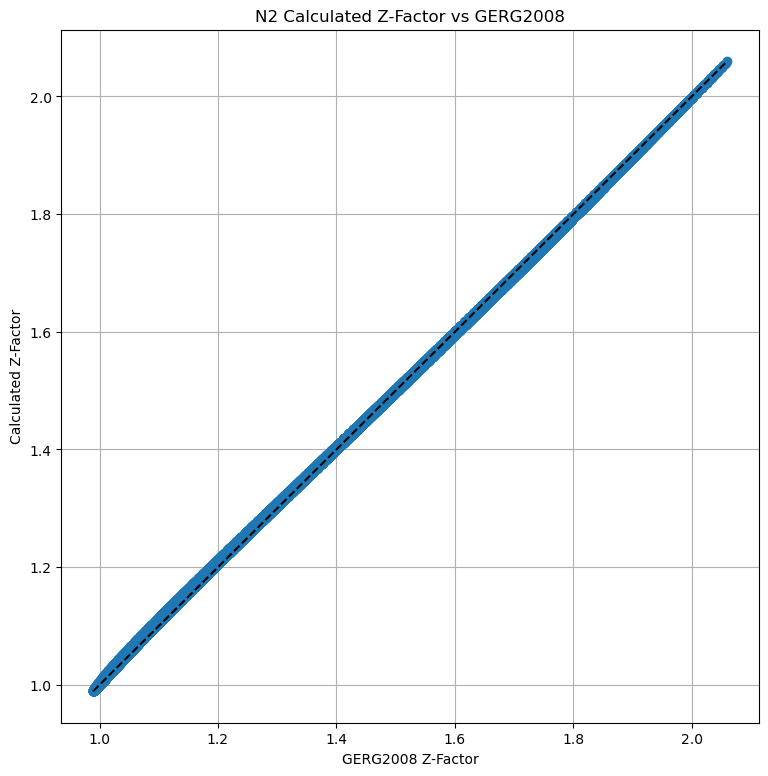

Average Relative error: 0.003741705781978691
95% of data better than error: 0.009723341629353564


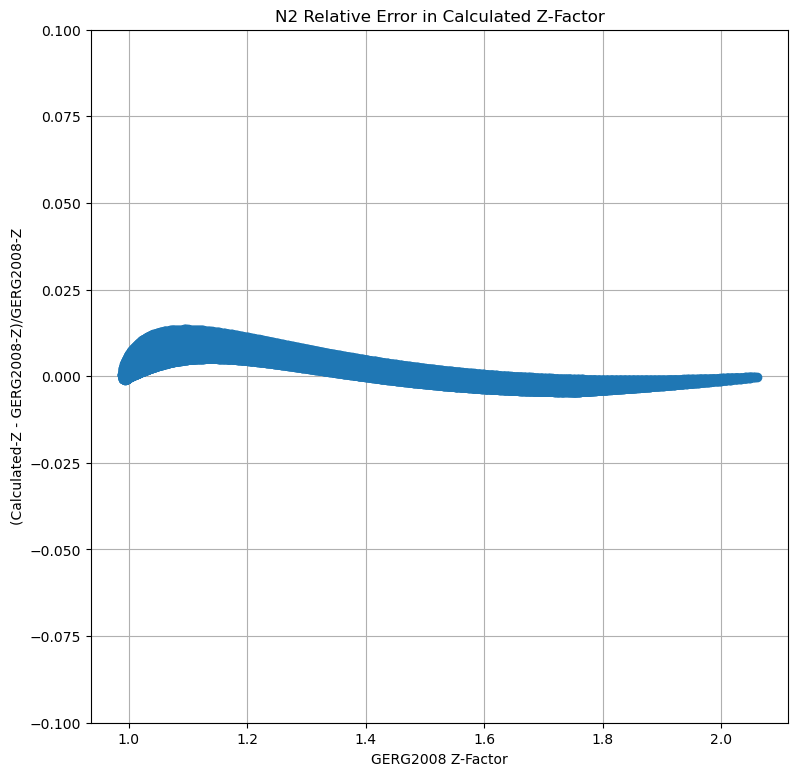

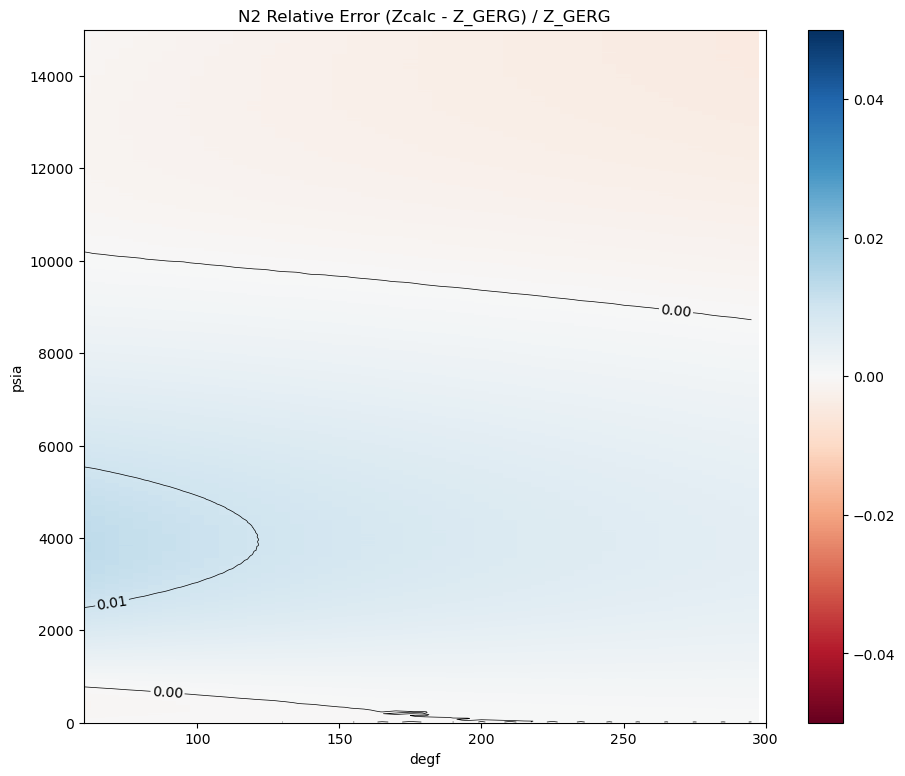

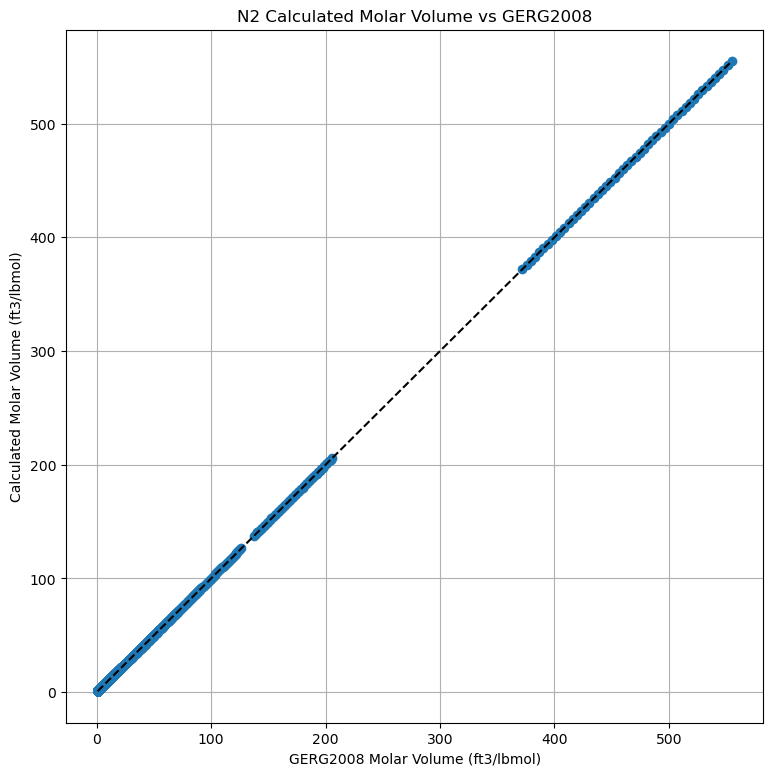

Average Relative error: 0.0037417057819786894
95% of data better than error: 0.009723341629353665


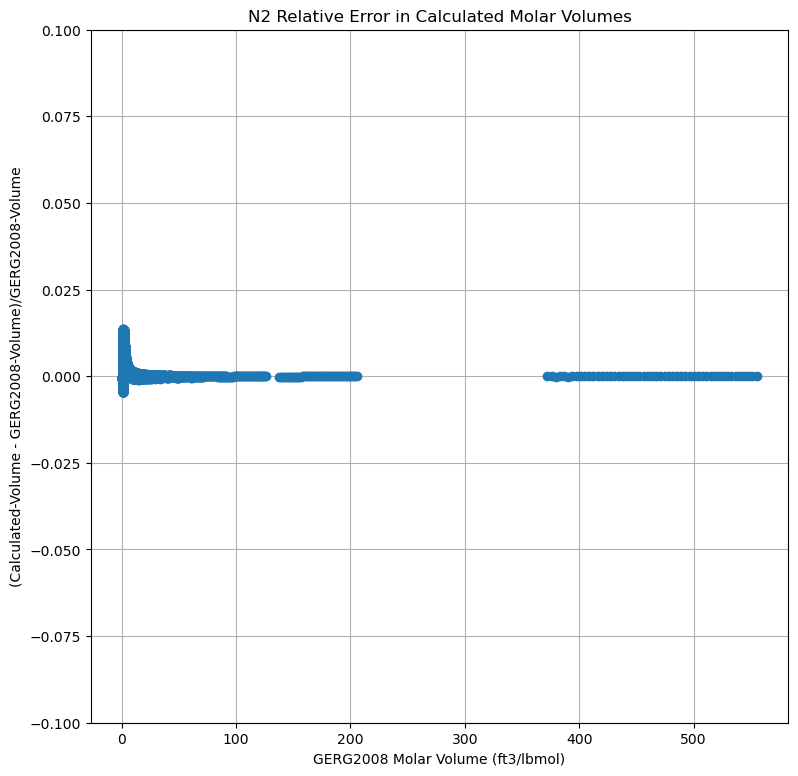

In [46]:
# Compare pure N2
mwGas = 28.014
sg = mwGas/mwAir
co2, h2s, n2 = 0.0, 0.0, 1.0
df = pd.read_excel('Z-GERG_N2.xlsx')#, sheet_name='N2')
degfs = np.array(df['Temperature (F)'])
psias = np.array(df['Pressure (psia)'])
Zs = np.array(df['Z'])
densities = psias*mwGas/(Zs*R*(degfs+degF2R))
calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sg, co2=co2, h2s=h2s, n2=n2))
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
errs = np.abs(calc_Zs - Zs)/Zs
Zplots('N2', [-233, 0.000323591, 0.333366681, 114.9031482, 13251.33895])
molar_plots('N2')

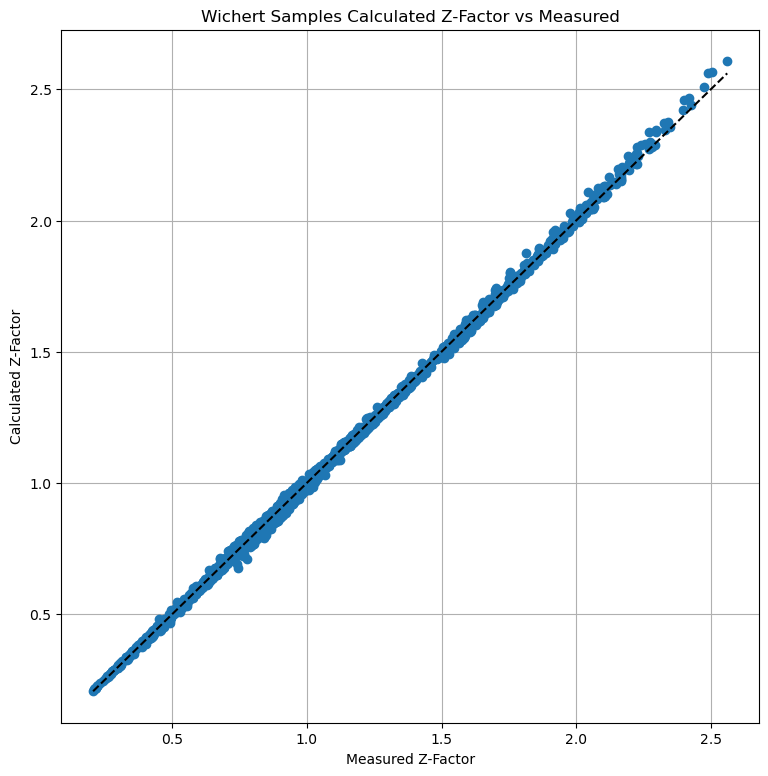

Average Relative error: 0.00846270903778044
99% of data better than error: 0.041236489418263425


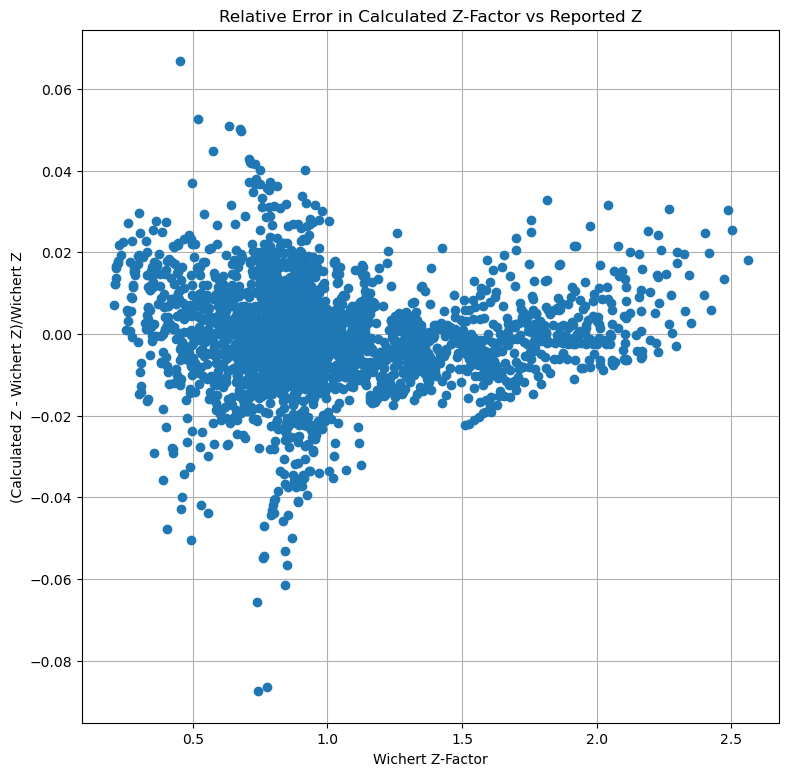

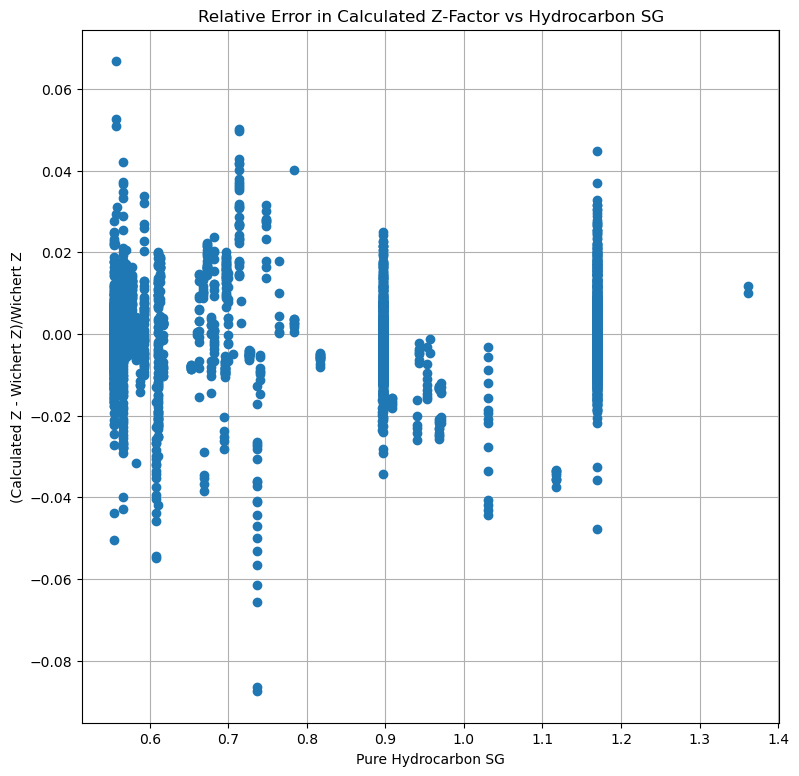

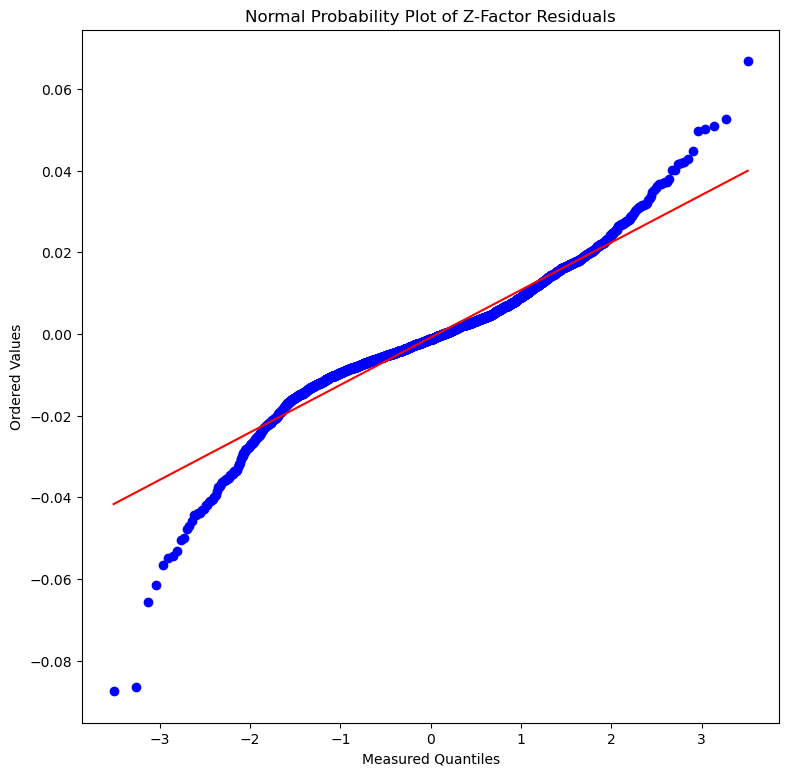

In [71]:
# Compare Wichert data
df = pd.read_excel('Wichert_data_export3.xlsx')

degfs = np.array(df['degf'])
psias = np.array(df['psia'])
sgs = np.array(df['sg'])
co2s = np.array(df['co2'])
h2ss = np.array(df['h2s'])
n2s = np.array(df['n2'])
Zs = np.array(df['Z'])

sg_hc = (sgs - (co2s * 44.01 + h2ss * 34.082 + n2s * 28.014) / mwAir) / (1 - co2s - h2ss - n2s)

calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sgs[i], co2=co2s[i], h2s=h2ss[i], n2=n2s[i]))
calc_Zs = np.array(calc_Zs)

z_dak_pmc = np.array([rtb.gas_z(psias[i], sgs[i], degfs[i], zmethod='DAK', cmethod='PMC', co2 = co2s[i], h2s = h2ss[i], n2 = n2s[i] ) for i in range(len(psias))])
z_dak_sut = np.array([rtb.gas_z(psias[i], sgs[i], degfs[i], zmethod='DAK', cmethod='SUT', co2 = co2s[i], h2s = h2ss[i], n2 = n2s[i] ) for i in range(len(psias))])

plt.plot(Zs, calc_Zs, 'o')
plt.plot([min(Zs), max(Zs)], [min(Zs), max(Zs)], '--', c='k')
plt.title('Wichert Samples Calculated Z-Factor vs Measured')
plt.xlabel('Measured Z-Factor')
plt.ylabel('Calculated Z-Factor')
plt.grid()
plt.savefig('wichert.png')
plt.show()
errs = np.abs(calc_Zs - Zs)/Zs
print('Average Relative error:',np.mean(errs))
print('99% of data better than error:', np.percentile(errs, 99))

errs = (calc_Zs - Zs)/Zs
plt.plot(Zs, errs, 'o')
plt.title('Relative Error in Calculated Z-Factor vs Reported Z')
plt.xlabel('Wichert Z-Factor')
plt.ylabel('(Calculated Z - Wichert Z)/Wichert Z')
plt.grid()
plt.savefig('rel_wichert.png')
plt.show()

plt.plot(sg_hc, errs, 'o')
plt.title('Relative Error in Calculated Z-Factor vs Hydrocarbon SG')
plt.xlabel('Pure Hydrocarbon SG')
plt.ylabel('(Calculated Z - Wichert Z)/Wichert Z')
plt.grid()
plt.savefig('rel_wichert_HC_SG.png')
plt.show()

fig, ax = plt.subplots()
res = stats.probplot(errs, plot=ax)
ax.set_title('Normal Probability Plot of Z-Factor Residuals')
ax.set_xlabel('Measured Quantiles')
ax.set_ylabel('Ordered Values')
plt.savefig('norm_wichert.png')
plt.show()

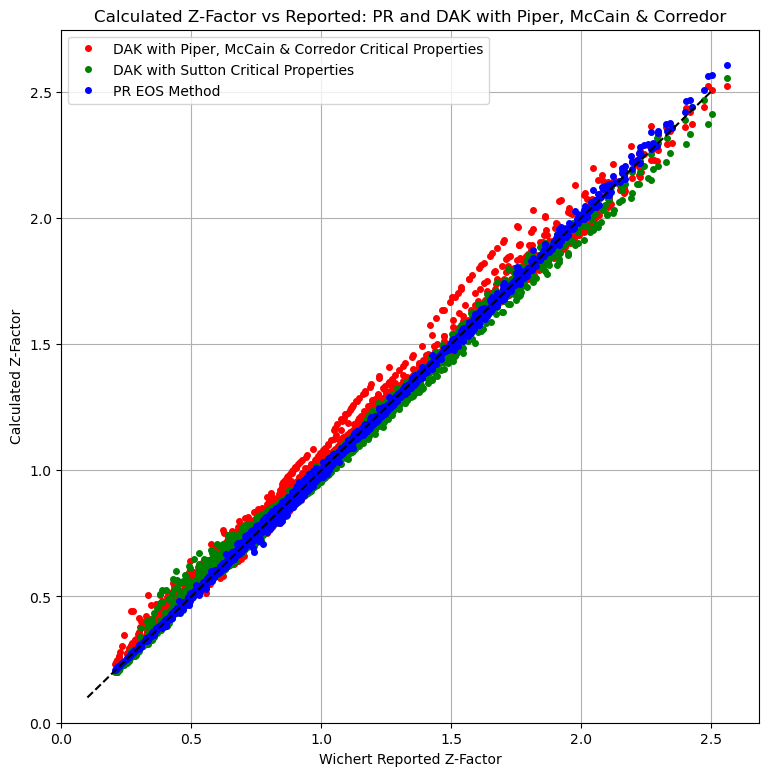

In [72]:
plt.plot(Zs, z_dak_pmc, 'o', c='r', markersize=4, label='DAK with Piper, McCain & Corredor Critical Properties')
plt.plot(Zs, z_dak_sut, 'o', c='g', markersize=4, label='DAK with Sutton Critical Properties')
plt.plot(Zs, calc_Zs, 'o', c='b', markersize=4, label='PR EOS Method')
plt.xlabel('Wichert Reported Z-Factor')
plt.ylabel('Calculated Z-Factor')
plt.plot([0.1, 2.5], [0.1, 2.5], '--', c='k')
plt.ylim(0, None)
plt.xlim(0, None)
plt.grid()
plt.title('Calculated Z-Factor vs Reported: PR and DAK with Piper, McCain & Corredor')
plt.legend(loc='upper left')
plt.savefig('Crossplot_Z-PR_DAK.png')
plt.show()

In [54]:
pr_er = (calc_Zs - Zs)/Zs
dak_sut_err = (z_dak_sut - Zs)/Zs
dak_pmc_err = (z_dak_pmc - Zs)/Zs

errs = [pr_er, dak_sut_err, dak_pmc_err]
names = ['Peng Robinson', 'DAK + Sutton & Wichert', 'DAK + PMC']
for e, err in enumerate(errs):
    avg = np.mean(err)
    maxerr = max(err)
    print(names[e], 'Avg Rel. Error: '+str(round(avg, 3))+', Max rel. Error: '+str(round(maxerr, 3))+', 95% Errors less than ', str(round(np.percentile(err, 95),4)))

Peng Robinson Avg Rel. Error: -0.001, Max rel. Error: 0.067, 95% Errors less than  0.018
DAK + Sutton & Wichert Avg Rel. Error: 0.003, Max rel. Error: 0.359, 95% Errors less than  0.0618
DAK + PMC Avg Rel. Error: 0.024, Max rel. Error: 0.651, 95% Errors less than  0.122


              psia      degf       co2       h2s        n2     sg_hc  Residual
psia      1.000000  0.085194  0.083600  0.025577  0.117934  0.193452  0.021748
degf      0.085194  1.000000  0.028806  0.012623  0.053889  0.123846 -0.122891
co2       0.083600  0.028806  1.000000 -0.337935 -0.277348  0.100566 -0.102129
h2s       0.025577  0.012623 -0.337935  1.000000 -0.314835  0.011540  0.106293
n2        0.117934  0.053889 -0.277348 -0.314835  1.000000  0.146743  0.037125
sg_hc     0.193452  0.123846  0.100566  0.011540  0.146743  1.000000  0.002957
Residual  0.021748 -0.122891 -0.102129  0.106293  0.037125  0.002957  1.000000


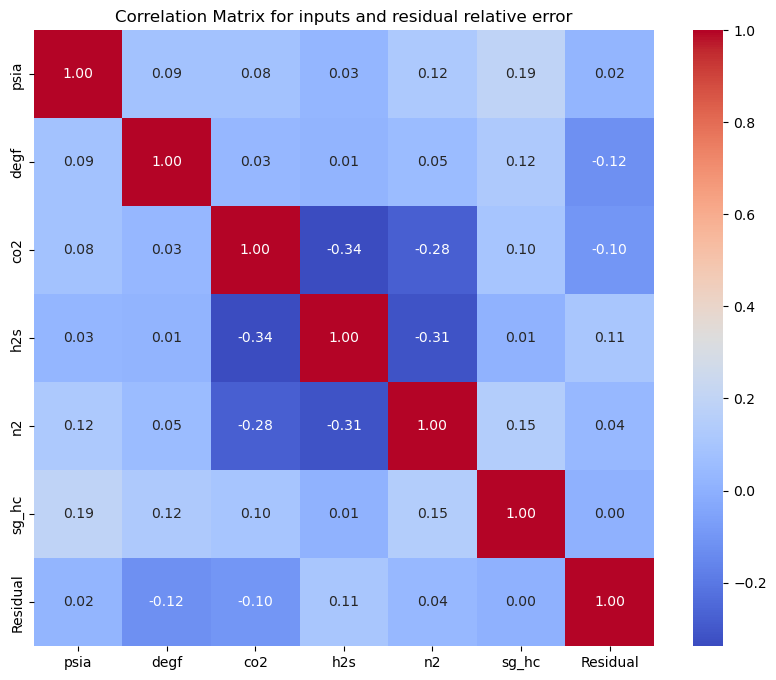

In [77]:
errs = (calc_Zs - Zs)/Zs
if 'Sample' in list(df):
    df.drop(columns = ['Sample'], inplace=True)
if 'Source' in list(df):
    df.drop(columns = ['Source'], inplace=True)
try:
    df.drop(columns = ['Z'], inplace=True)
    df['sg_hc'] = (df['sg'] - (df['co2'] * 44.01 + df['h2s'] * 34.082 + df['n2'] * 28.014) / 28.97) / (1 - df['co2'] - df['h2s'] - df['n2'])
    df.drop(columns = ['sg'], inplace=True)
except:
    pass
df['Residual'] = errs
correlation_matrix = df.corr()
print(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for inputs and residual relative error')
plt.savefig('corel_wichert.png')
plt.show()

              psia      degf       co2       h2s        n2     sg_hc  Residual
psia      1.000000  0.085194  0.083600  0.025577  0.117934  0.193452  0.885459
degf      0.085194  1.000000  0.028806  0.012623  0.053889  0.123846  0.106106
co2       0.083600  0.028806  1.000000 -0.337935 -0.277348  0.100566 -0.044781
h2s       0.025577  0.012623 -0.337935  1.000000 -0.314835  0.011540 -0.187029
n2        0.117934  0.053889 -0.277348 -0.314835  1.000000  0.146743  0.302671
sg_hc     0.193452  0.123846  0.100566  0.011540  0.146743  1.000000  0.161756
Residual  0.885459  0.106106 -0.044781 -0.187029  0.302671  0.161756  1.000000


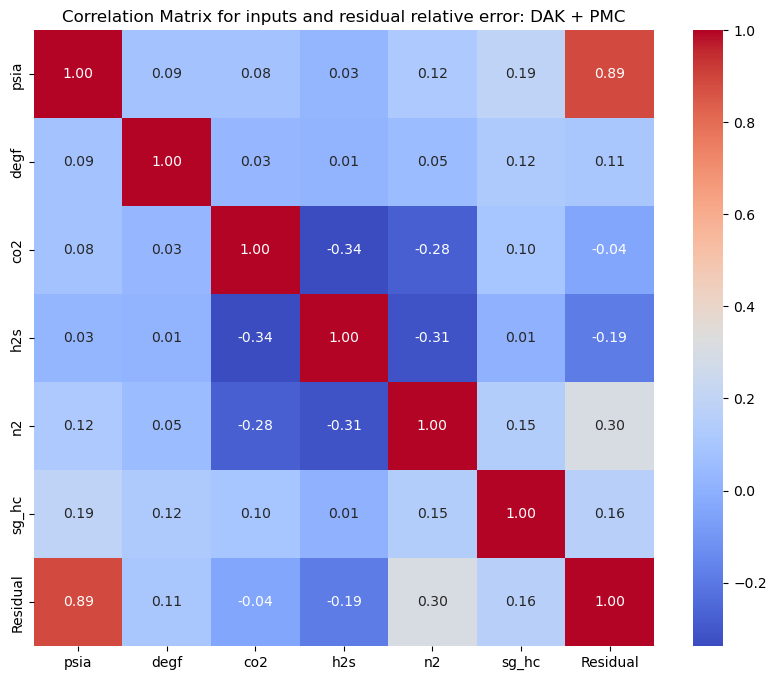

In [78]:
# DAK + PMC
errs = z_dak_pmc
if 'Sample' in list(df):
    df.drop(columns = ['Sample'], inplace=True)
if 'Source' in list(df):
    df.drop(columns = ['Source'], inplace=True)
try:
    df.drop(columns = ['Z'], inplace=True)
    df['sg_hc'] = (df['sg'] - (df['co2'] * 44.01 + df['h2s'] * 34.082 + df['n2'] * 28.014) / 28.97) / (1 - df['co2'] - df['h2s'] - df['n2'])
    df.drop(columns = ['sg'], inplace=True)
except:
    pass
df['Residual'] = errs
correlation_matrix = df.corr()
print(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for inputs and residual relative error: DAK + PMC')
plt.savefig('corel_wichert_DAK_PMC.png')
plt.show()

C:\Users\burmr\AppData\Local\Temp\ipykernel_21896\309168912.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


              psia      degf       co2       h2s        n2     sg_hc  Residual
psia      1.000000  0.085194  0.083600  0.025577  0.117934  0.193452  0.870979
degf      0.085194  1.000000  0.028806  0.012623  0.053889  0.123846  0.110052
co2       0.083600  0.028806  1.000000 -0.337935 -0.277348  0.100566 -0.042163
h2s       0.025577  0.012623 -0.337935  1.000000 -0.314835  0.011540 -0.247234
n2        0.117934  0.053889 -0.277348 -0.314835  1.000000  0.146743  0.304231
sg_hc     0.193452  0.123846  0.100566  0.011540  0.146743  1.000000  0.123165
Residual  0.870979  0.110052 -0.042163 -0.247234  0.304231  0.123165  1.000000


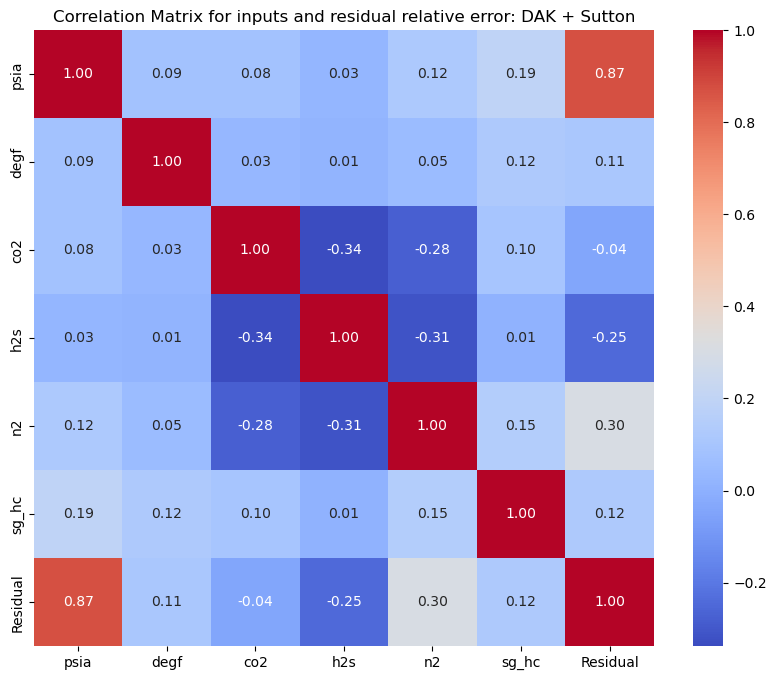

In [75]:
# DAK + Sutton & Wichert
errs = z_dak_sut
if 'Sample' in list(df):
    df.drop(columns = ['Sample'], inplace=True)
if 'Source' in list(df):
    df.drop(columns = ['Source'], inplace=True)
try:
    df.drop(columns = ['Z'], inplace=True)
    df['sg_hc'] = (df['sg'] - (df['co2'] * 44.01 + df['h2s'] * 34.082 + df['n2'] * 28.014) / 28.97) / (1 - df['co2'] - df['h2s'] - df['n2'])
    df.drop(columns = ['sg'], inplace=True)
except:
    pass
df['Residual'] = errs
correlation_matrix = df.corr()
print(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for inputs and residual relative error: DAK + Sutton')
plt.savefig('corel_wichert_DAK_PMC.png')
plt.show()

In [56]:
errs = (calc_Zs - Zs)/Zs
for i in list(np.where(errs>0.15)[0]):
    print(i, degfs[i], psias[i], sgs[i], co2s[i], h2ss[i], n2s[i])
    

In [20]:
co2, h2s, n2 = 0.0, 0, 0
sg = (0.96*16.043 + 0.03 * 30.070 + 0.01 * 44.097 + co2 * 44.010)/28.97
sg_hc = (sg - (co2 * 44.01 + h2s * 34.082 + n2 * 28.014) / mwAir) / (1 - co2 - h2s - n2)

In [21]:
df

,psia,degf,co2,h2s,n2,Source,sg_hc,Residual
0,600,40,0.005,0.226,0.0046,Wichert,0.559978,0.012694
1,1000,40,0.005,0.226,0.0046,Wichert,0.559978,0.016057
2,1500,40,0.005,0.226,0.0046,Wichert,0.559978,0.017339
3,2000,40,0.005,0.226,0.0046,Wichert,0.559978,0.014812
4,2500,40,0.005,0.226,0.0046,Wichert,0.559978,0.017796
...,...,...,...,...,...,...,...,...
4944,1000,280,0.000,0.000,0.8750,GERG,1.556362,0.003835
4945,2000,280,0.000,0.000,0.8750,GERG,1.556362,0.008228
4946,5000,280,0.000,0.000,0.8750,GERG,1.556362,0.010440
4947,10000,280,0.000,0.000,0.8750,GERG,1.556362,-0.003007


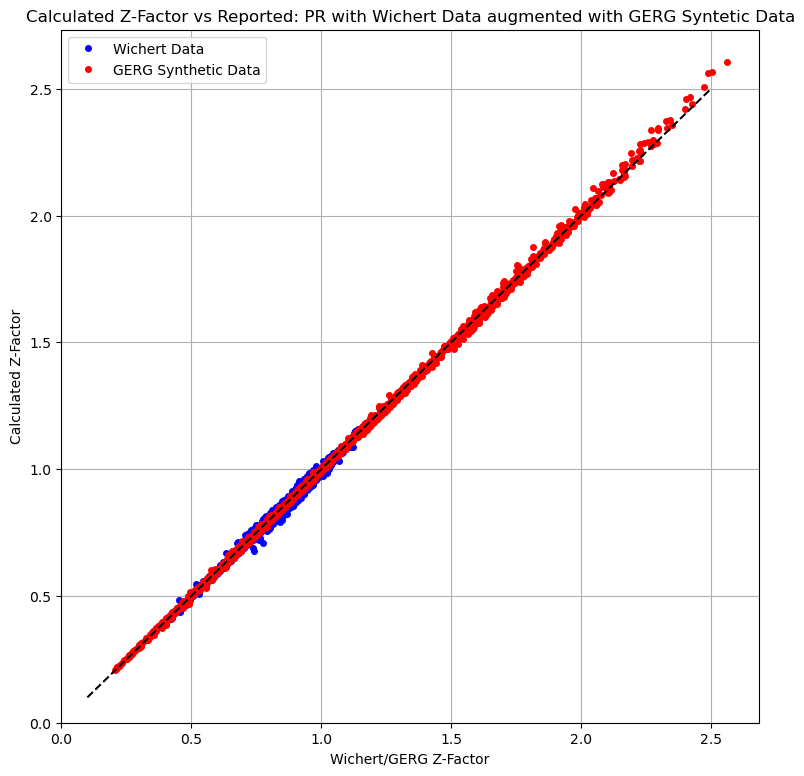

In [62]:
# Compare Wichert & synthetic GERG data
df = pd.read_excel('Wichert_data_export3.xlsx')
filtered = df[df['Source'] == 'Wichert']

degfs = np.array(filtered['degf'])
psias = np.array(filtered['psia'])
sgs = np.array(filtered['sg'])
co2s = np.array(filtered['co2'])
h2ss = np.array(filtered['h2s'])
n2s = np.array(filtered['n2'])
Zs = np.array(filtered['Z'])

calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sgs[i], co2=co2s[i], h2s=h2ss[i], n2=n2s[i]))
calc_Zs = np.array(calc_Zs)
plt.plot(Zs, calc_Zs, 'o', c='b', markersize=4, label='Wichert Data')

filtered = df[df['Source'] == 'GERG']

degfs = np.array(filtered['degf'])
psias = np.array(filtered['psia'])
sgs = np.array(filtered['sg'])
co2s = np.array(filtered['co2'])
h2ss = np.array(filtered['h2s'])
n2s = np.array(filtered['n2'])
Zs = np.array(filtered['Z'])

calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sgs[i], co2=co2s[i], h2s=h2ss[i], n2=n2s[i]))
calc_Zs = np.array(calc_Zs)
plt.plot(Zs, calc_Zs, 'o', c='r', markersize=4, label='GERG Synthetic Data')

plt.xlabel('Wichert/GERG Z-Factor')
plt.ylabel('Calculated Z-Factor')
plt.plot([0.1, 2.5], [0.1, 2.5], '--', c='k')
plt.ylim(0, None)
plt.xlim(0, None)
plt.grid()
plt.title('Calculated Z-Factor vs Reported: PR with Wichert Data augmented with GERG Syntetic Data')
plt.legend(loc='upper left')
plt.savefig('Crossplot_Z-PR_GERG&Wichert.png')
plt.show()

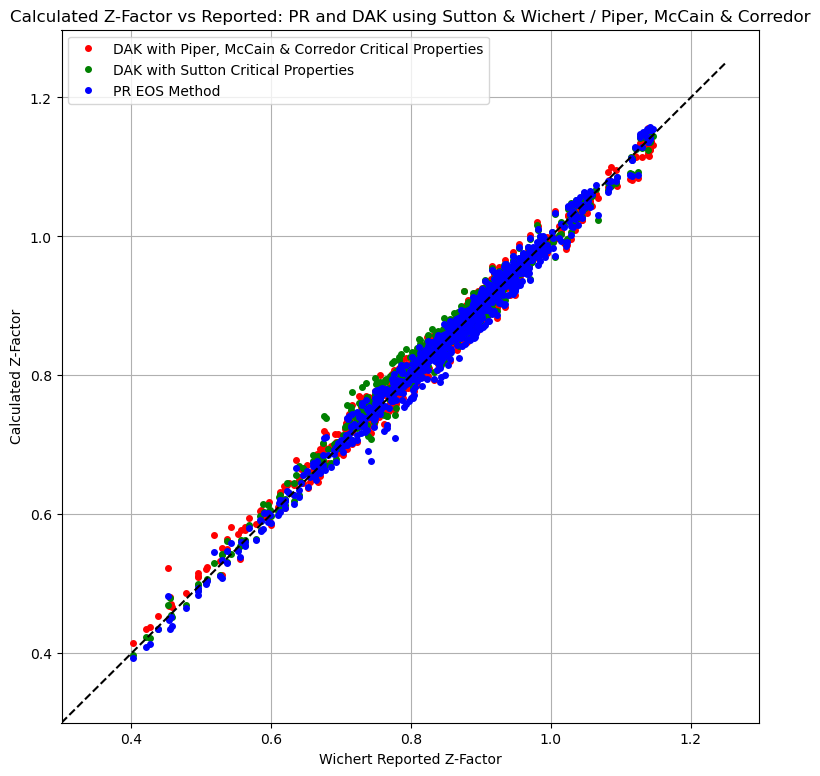

In [82]:
# Compare Wichert & synthetic GERG data
df = pd.read_excel('Wichert_data_export3.xlsx')
filtered = df[df['Source'] == 'Wichert']

degfs = np.array(filtered['degf'])
psias = np.array(filtered['psia'])
sgs = np.array(filtered['sg'])
co2s = np.array(filtered['co2'])
h2ss = np.array(filtered['h2s'])
n2s = np.array(filtered['n2'])
Zs = np.array(filtered['Z'])

calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sgs[i], co2=co2s[i], h2s=h2ss[i], n2=n2s[i]))
calc_Zs = np.array(calc_Zs)

z_dak_pmc = np.array([rtb.gas_z(psias[i], sgs[i], degfs[i], zmethod='DAK', cmethod='PMC', co2 = co2s[i], h2s = h2ss[i], n2 = n2s[i] ) for i in range(len(psias))])
z_dak_sut = np.array([rtb.gas_z(psias[i], sgs[i], degfs[i], zmethod='DAK', cmethod='SUT', co2 = co2s[i], h2s = h2ss[i], n2 = n2s[i] ) for i in range(len(psias))])



plt.plot(Zs, z_dak_pmc, 'o', c='r', markersize=4, label='DAK with Piper, McCain & Corredor Critical Properties')
plt.plot(Zs, z_dak_sut, 'o', c='g', markersize=4, label='DAK with Sutton Critical Properties')
plt.plot(Zs, calc_Zs, 'o', c='b', markersize=4, label='PR EOS Method')

plt.xlabel('Wichert Reported Z-Factor')
plt.ylabel('Calculated Z-Factor')
plt.plot([0.3, 1.25], [0.3, 1.25], '--', c='k')
plt.ylim(0.3, None)
plt.xlim(0.3, None)
plt.grid()
plt.title('Calculated Z-Factor vs Reported: PR and DAK using Sutton & Wichert / Piper, McCain & Corredor')

plt.legend(loc='upper left')
plt.savefig('Crossplot_Z-PR_DAK.png')
plt.show()

In [81]:
pr_er = (calc_Zs - Zs)/Zs
dak_sut_err = (z_dak_sut - Zs)/Zs
dak_pmc_err = (z_dak_pmc - Zs)/Zs

errs = [pr_er, dak_sut_err, dak_pmc_err]
names = ['Peng Robinson', 'DAK + Sutton & Wichert', 'DAK + PMC']
for e, err in enumerate(errs):
    avg = np.mean(err)
    maxerr = max(err)
    print(names[e], 'Avg Rel. Error: '+str(round(avg, 3))+', Max rel. Error: '+str(round(maxerr, 3))+', 95% Errors less than ', str(round(np.percentile(err, 95),4)))

Peng Robinson Avg Rel. Error: -0.001, Max rel. Error: 0.067, 95% Errors less than  0.0222
DAK + Sutton & Wichert Avg Rel. Error: 0.007, Max rel. Error: 0.097, 95% Errors less than  0.0336
DAK + PMC Avg Rel. Error: 0.004, Max rel. Error: 0.157, 95% Errors less than  0.0349


<Axes: xlabel='co2', ylabel='Count'>

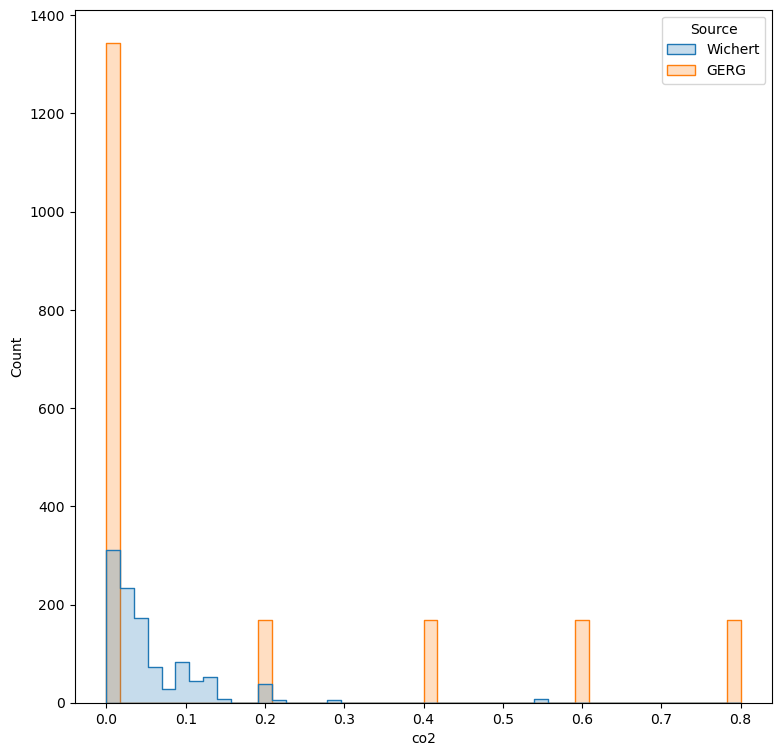

In [58]:
# plot overlapping histograms
sns.histplot(df, x='co2', hue='Source', element="step")

<Axes: xlabel='h2s', ylabel='Count'>

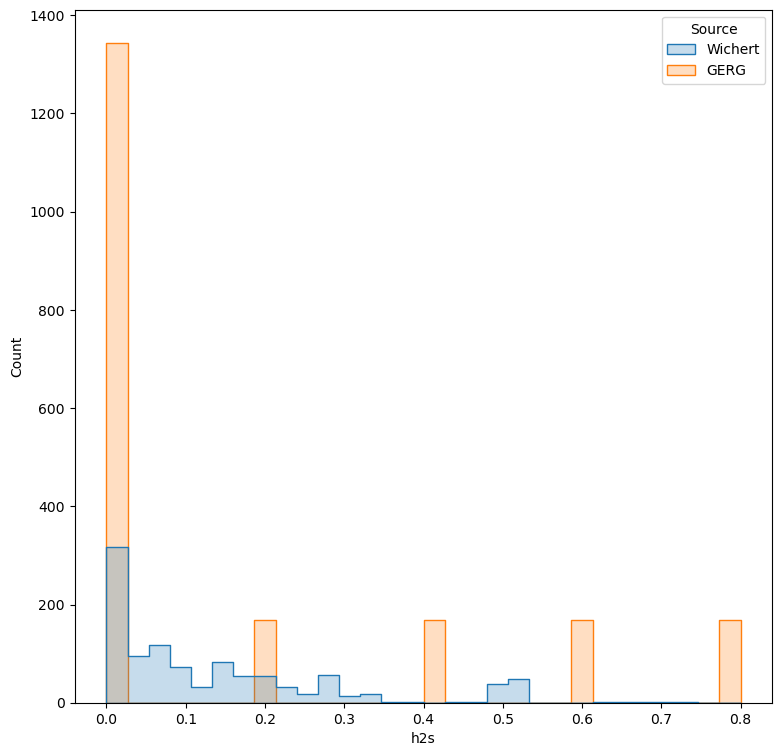

In [59]:
# plot overlapping histograms
sns.histplot(df, x='h2s', hue='Source', element="step")

<Axes: xlabel='n2', ylabel='Count'>

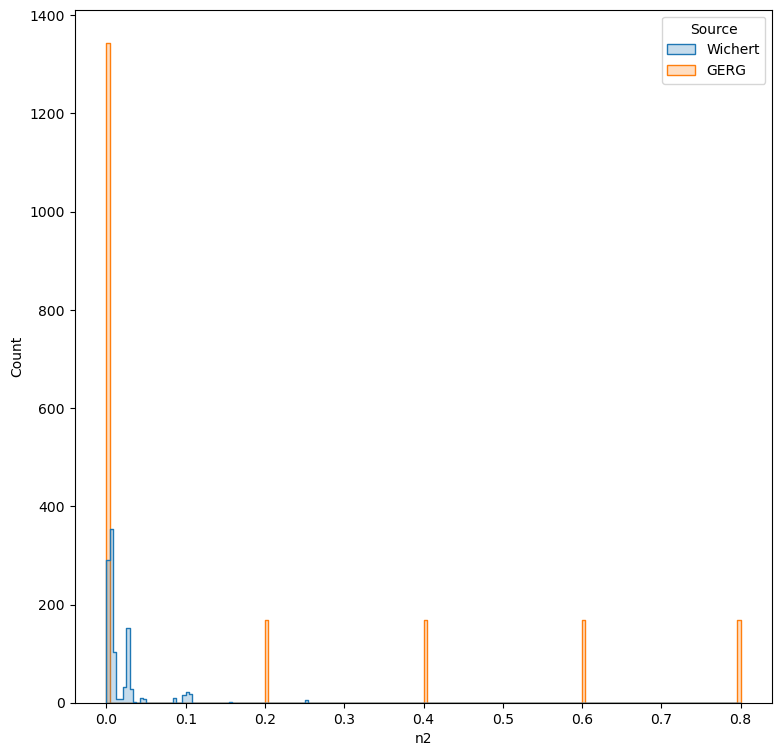

In [60]:
# plot overlapping histograms
sns.histplot(df, x='n2', hue='Source', element="step")

In [ ]:
# Compare 95% CO2 - Peng Robinson
method='Peng Robinson'
co2, h2s, n2 = 0.95, 0.0, 0.0
mw_hc = 16.043  # Methane
sg = (co2 * 44.010 + h2s * 34.082 + n2 * 28.014 + (1-co2-h2s-n2)*mw_hc)/28.97

df = pd.read_excel('Z-GERG_CO2_95pc.xlsx')#, sheet_name='CO2')
degfs = np.array(df['Temperature (F)'])
psias = np.array(df['Pressure (psia)'])
Zs = np.array(df['Z'])
densities = psias*mwGas/(Zs*R*(degfs+degF2R))
calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sg, co2=co2, h2s=h2s, n2=n2))
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
errs = (calc_Zs - Zs)/Zs
Zplots95('CO2', method)


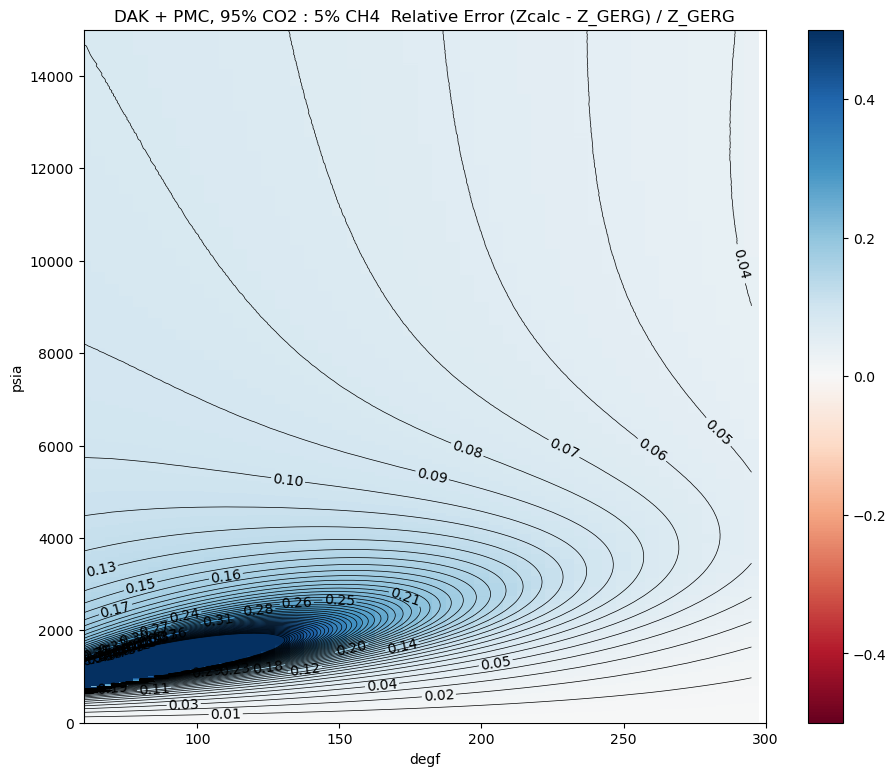

In [32]:
# Compare 95% CO2 - DAK + PMC
method = 'DAK + PMC'

calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(rtb.gas_z(psias[i], sg, degfs[i], zmethod='DAK', cmethod='PMC', co2 = co2, h2s = h2s, n2 = n2 ))
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
errs = (calc_Zs - Zs)/Zs
Zplots95('CO2', method)

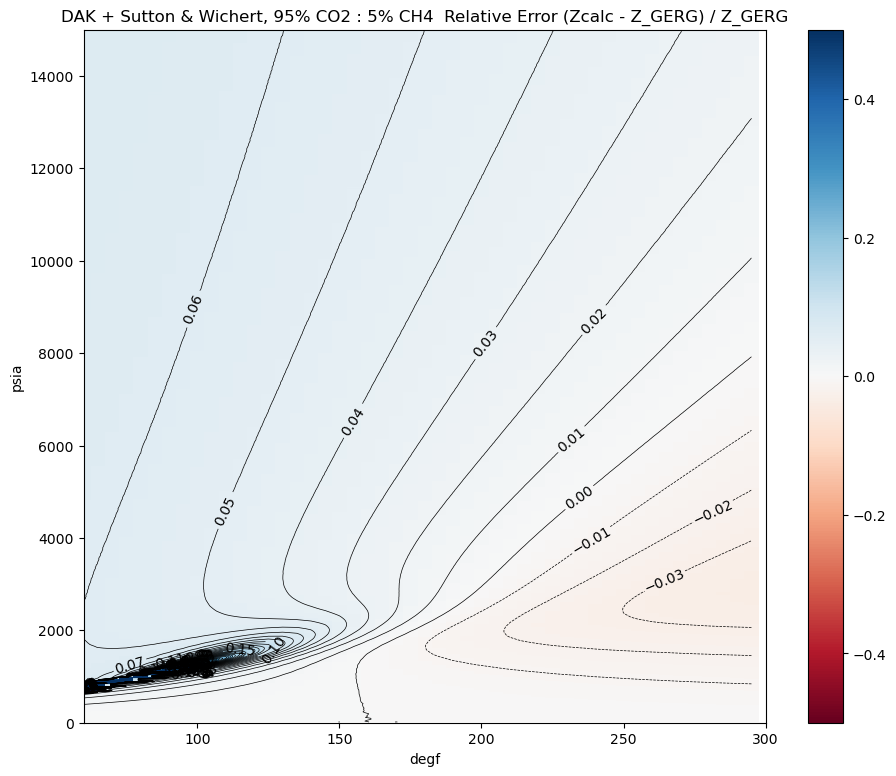

In [33]:
# Compare 95% CO2 - DAK + SUT
method = 'DAK + Sutton & Wichert'

calc_Zs = []
for i in range(len(degfs)):
    try:
        calc_Zs.append(rtb.gas_z(psias[i], sg, degfs[i], zmethod='DAK', cmethod='SUT', co2 = co2, h2s = h2s, n2 = n2 ))
    except:
        calc_Zs.append(10)
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
errs = (calc_Zs - Zs)/Zs
Zplots95('CO2', method)

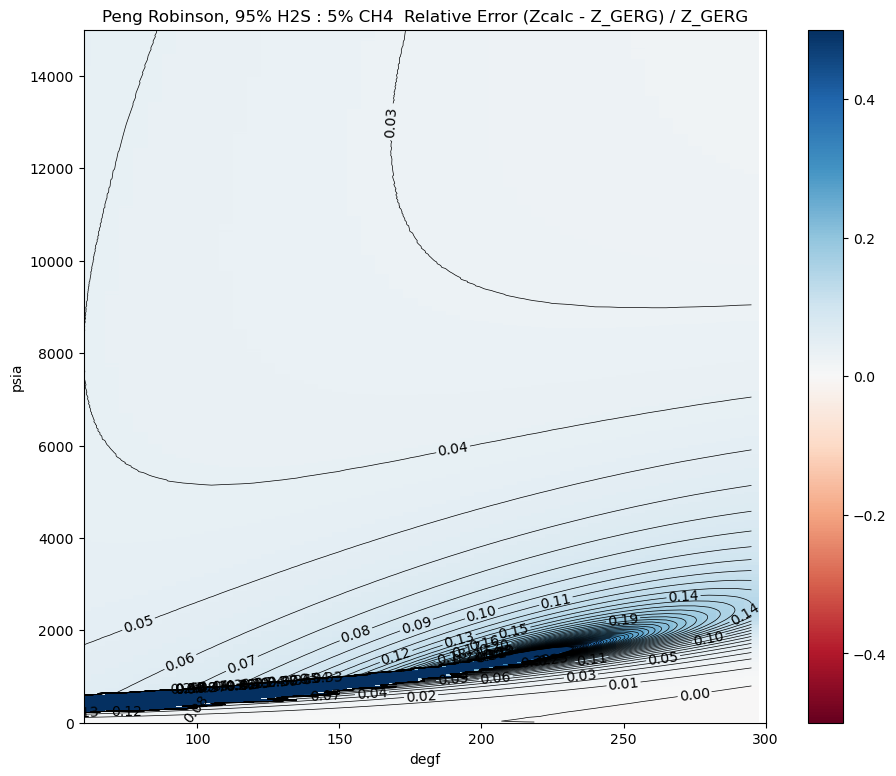

In [34]:
# Compare 95% H2S - PR
method='Peng Robinson'
co2, h2s, n2 = 0.0, 0.95, 0.0
mw_hc = 16.043 # Methane
sg = (co2 * 44.010 + h2s * 34.082 + n2 * 28.014 + (1-co2-h2s-n2)*mw_hc)/28.97

df = pd.read_excel('Z-GERG_H2S_95pc.xlsx')#, sheet_name='CO2')
degfs = np.array(df['Temperature (F)'])
psias = np.array(df['Pressure (psia)'])
Zs = np.array(df['Z'])
densities = psias*mwGas/(Zs*R*(degfs+degF2R))
calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sg, co2=co2, h2s=h2s, n2=n2))
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
errs = (calc_Zs - Zs)/Zs
Zplots95('H2S', method)

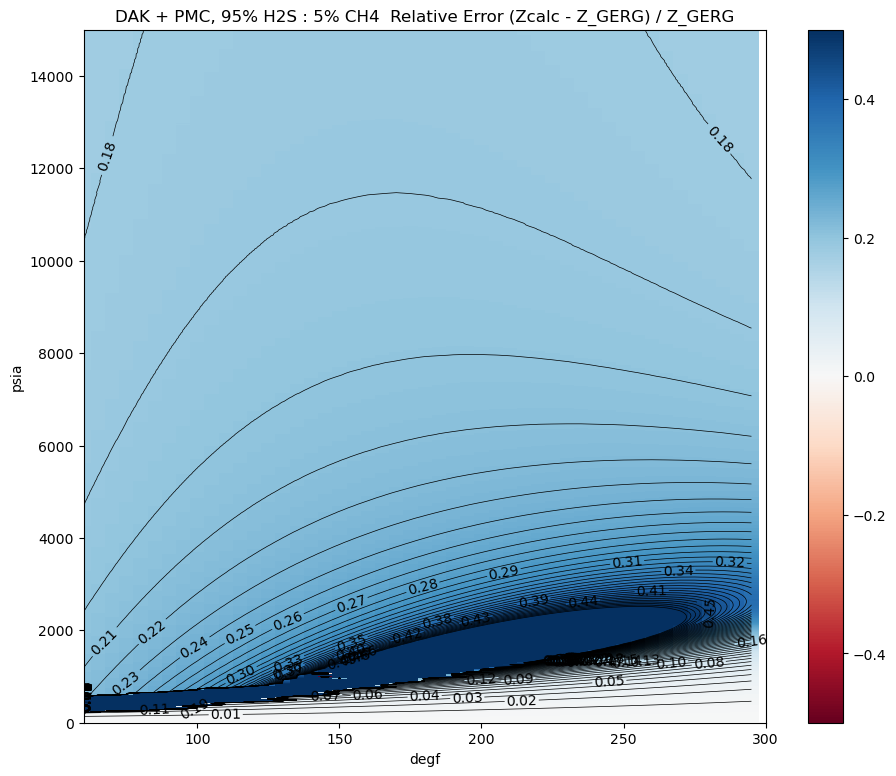

In [35]:
method = 'DAK + PMC'

calc_Zs = []
for i in range(len(degfs)):
    try:
        calc_Zs.append(rtb.gas_z(psias[i], sg, degfs[i], zmethod='DAK', cmethod='PMC', co2 = co2, h2s = h2s, n2 = n2 ))
    except:
        calc_Zs.append(10)
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
errs = (calc_Zs - Zs)/Zs
Zplots95('H2S', method)

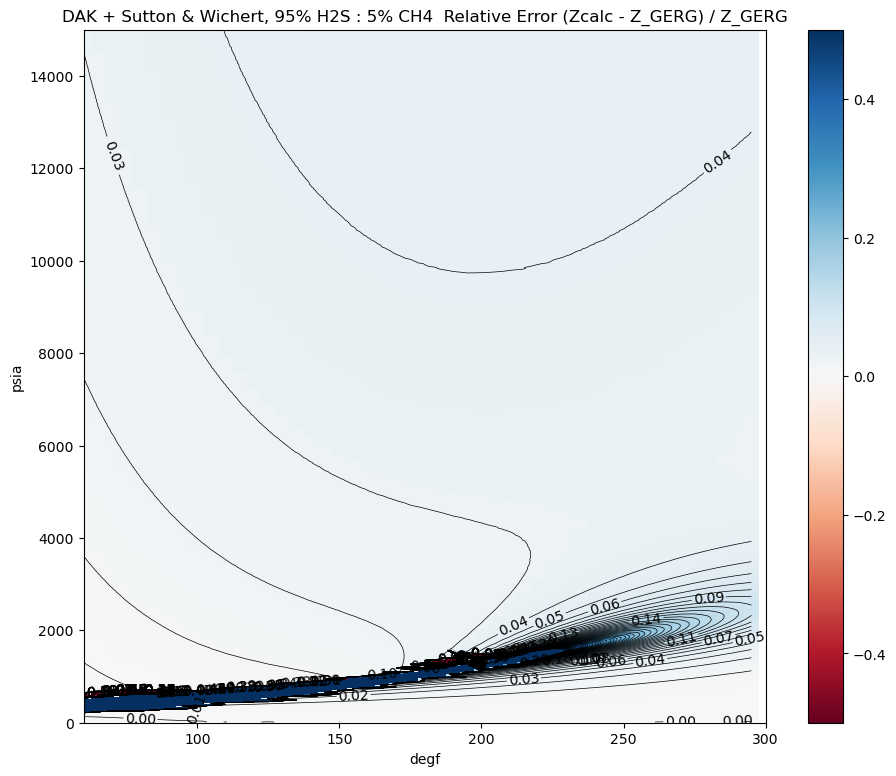

In [36]:
# Compare 95% H2S - DAK + SUT
method = 'DAK + Sutton & Wichert'

calc_Zs = []
for i in range(len(degfs)):
    try:
        calc_Zs.append(rtb.gas_z(psias[i], sg, degfs[i], zmethod='DAK', cmethod='SUT', co2 = co2, h2s = h2s, n2 = n2 ))
    except:
        calc_Zs.append(10)
        tc, pc = rtb.gas_tc_pc(sg = sg, n2=n2, co2=co2, h2s=h2s, cmethod='SUT')
        print(psias[i], sg, degfs[i], psias[i]/pc, (degfs[i]+degF2R)/tc)
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
errs = (calc_Zs - Zs)/Zs
Zplots95('H2S', method)

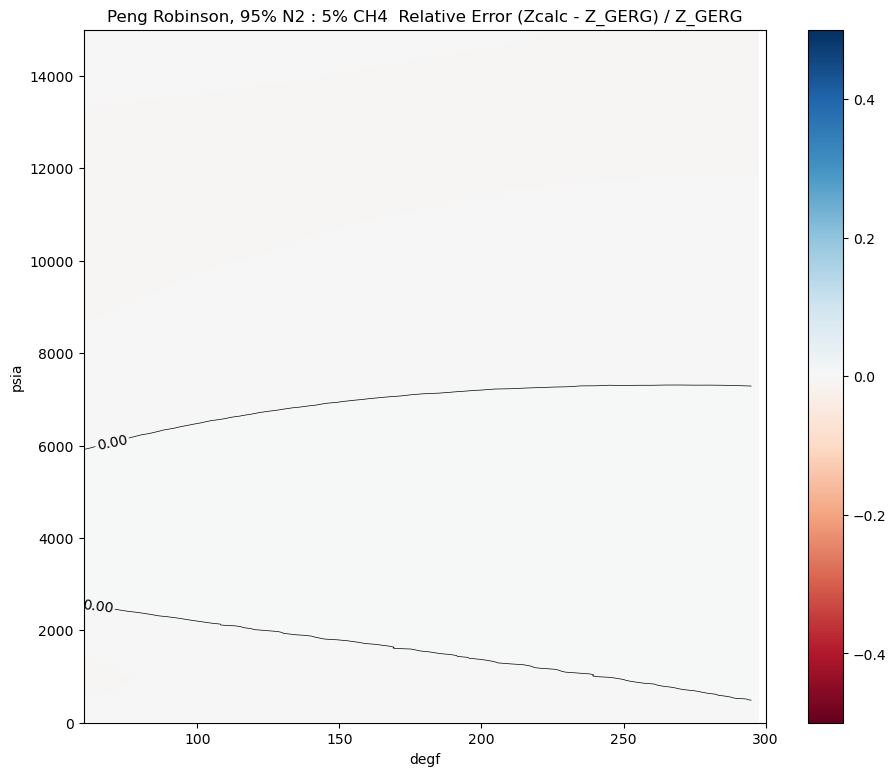

In [37]:
# Compare 95% N2 - PR
method='Peng Robinson'
co2, h2s, n2 = 0.0, 0.0, 0.95
mw_hc = 16.043 # Methane
sg = (co2 * 44.010 + h2s * 34.082 + n2 * 28.014 + (1-co2-h2s-n2)*mw_hc)/28.97

df = pd.read_excel('Z-GERG_N2_90pc.xlsx')#, sheet_name='CO2')
degfs = np.array(df['Temperature (F)'])
psias = np.array(df['Pressure (psia)'])
Zs = np.array(df['Z'])
densities = psias*mwGas/(Zs*R*(degfs+degF2R))
calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sg, co2=co2, h2s=h2s, n2=n2))
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
errs = (calc_Zs - Zs)/Zs
Zplots95('N2', method)

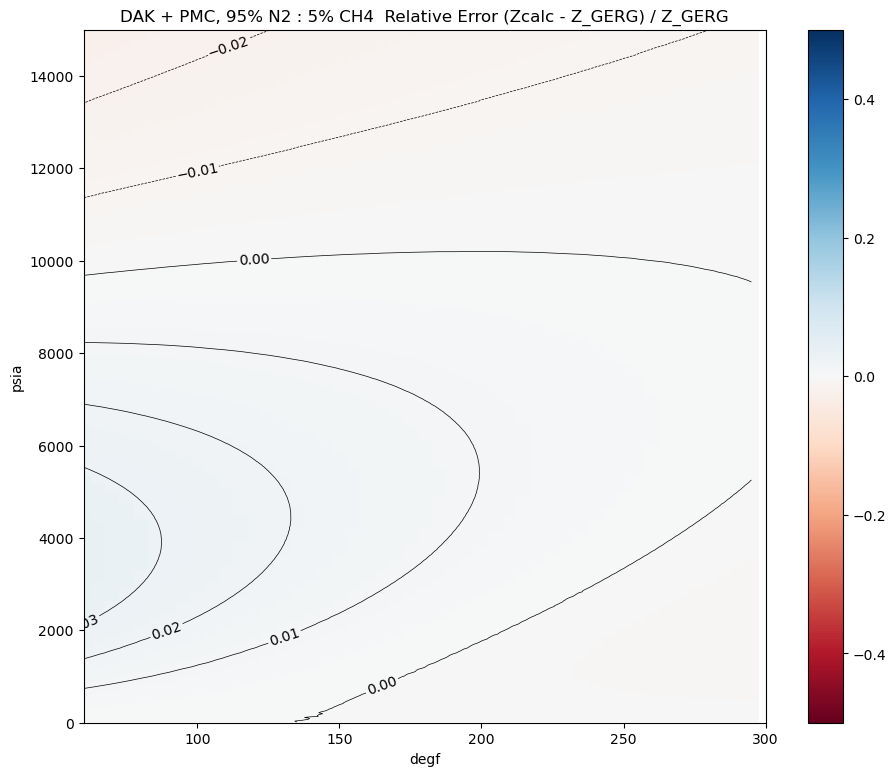

In [38]:
method = 'DAK + PMC'

calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(rtb.gas_z(psias[i], sg, degfs[i], zmethod='DAK', cmethod='PMC', co2 = co2, h2s = h2s, n2 = n2 ))
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
errs = (calc_Zs - Zs)/Zs
Zplots95('N2', method)

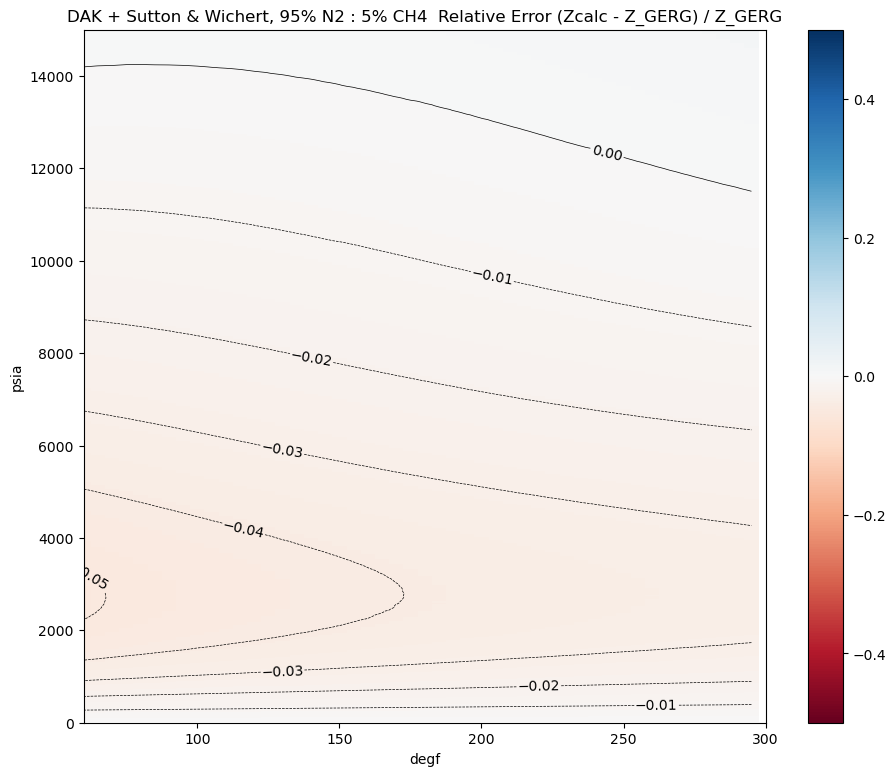

In [39]:
method = 'DAK + Sutton & Wichert'

calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(rtb.gas_z(psias[i], sg, degfs[i], zmethod='DAK', cmethod='SUT', co2 = co2, h2s = h2s, n2 = n2 ))
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
errs = (calc_Zs - Zs)/Zs
Zplots95('N2', method)